# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
from numpy import random
import requests
import json
from scipy.stats import linregress
from config import api_key

# Creating a random array of latitudes and longitudes
lat_all = np.random.uniform(-90, 90, size=1500)
lng_all = np.random.uniform(-180, 180, size=1500)

# Zipping latitudes and longitudes in a list of coordinates
coord = list(zip(lat_all,lng_all))



## Generate Cities List

In [6]:
# Generating a list of cities

cities = []

for lat, lng in coord:
    city = citipy.nearest_city(lat, lng)
    name = city.city_name 
    cities.append(name)
    
# Dropping the repetitive cities, leaving only unique ones

cities = list(dict.fromkeys(cities))

print(f'Number of random cities: {len(cities)}')

Number of random cities: 627


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Base Url

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

# Defining a function to split the cities in sets of 50

def divide_chunks(l, n): 
      
    for i in range(0, len(l), n):  
        yield l[i:i + n] 

grouped_cities = list(divide_chunks(cities, 50)) 

# Creating variables to store information

new_cities = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
country = []
date = []
wind_speed = []


# Doing successive API calls from openweathermap using for loops, and then printing the data

print(f'Data Retrieval has begun.')
print(f'------------------------')

for city in grouped_cities:
    for i in city:
        response = requests.get(url + i).json()
    
        try:
            print(f'Working on index {str(city.index(i))} set {str(grouped_cities.index(city))} | {i}')
            new_cities.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            wind_speed.append(response['wind']['speed'])
        except:
            print('City not found, skipping...')

print(f'Total number of random cities found in openweathermap application is {len(lat)}.')
print(f'------------------------')
print(f'Data Retrieval complete.')
        
        



Data Retrieval has begun.
------------------------
Working on index 0 set 0 | keti bandar
Working on index 1 set 0 | kieta
Working on index 2 set 0 | kodiak
Working on index 3 set 0 | jamestown
Working on index 4 set 0 | shenjiamen
Working on index 5 set 0 | rikitea
Working on index 6 set 0 | san patricio
Working on index 7 set 0 | saint-philippe
Working on index 8 set 0 | hasaki
Working on index 9 set 0 | mahebourg
Working on index 10 set 0 | srednekolymsk
Working on index 11 set 0 | yanaul
Working on index 12 set 0 | sitio novo do tocantins
Working on index 13 set 0 | esperance
Working on index 14 set 0 | caravelas
Working on index 15 set 0 | atuona
Working on index 16 set 0 | mataura
Working on index 17 set 0 | bereda
Working on index 18 set 0 | busselton
Working on index 19 set 0 | cherskiy
Working on index 20 set 0 | dzhusaly
City not found, skipping...
Working on index 21 set 0 | vaini
Working on index 22 set 0 | bethel
Working on index 23 set 0 | egvekinot
Working on index 24 se

Working on index 7 set 4 | hope
Working on index 8 set 4 | bambanglipuro
Working on index 9 set 4 | peace river
Working on index 10 set 4 | myanaung
Working on index 11 set 4 | waingapu
Working on index 12 set 4 | beyneu
Working on index 13 set 4 | new norfolk
Working on index 14 set 4 | harper
Working on index 15 set 4 | puerto escondido
Working on index 16 set 4 | deputatskiy
Working on index 17 set 4 | cap malheureux
Working on index 18 set 4 | benghazi
Working on index 19 set 4 | padang
Working on index 20 set 4 | iqaluit
Working on index 21 set 4 | comodoro rivadavia
Working on index 22 set 4 | mogapi
Working on index 23 set 4 | souillac
Working on index 24 set 4 | inhambane
Working on index 25 set 4 | lumeje
Working on index 26 set 4 | shubarshi
Working on index 27 set 4 | kamenskoye
City not found, skipping...
Working on index 28 set 4 | teahupoo
Working on index 29 set 4 | codrington
Working on index 30 set 4 | susangerd
Working on index 31 set 4 | nizhneyansk
City not found, s

Working on index 17 set 8 | camargo
Working on index 18 set 8 | kuching
Working on index 19 set 8 | inuvik
Working on index 20 set 8 | yaguajay
Working on index 21 set 8 | presidencia roque saenz pena
Working on index 22 set 8 | urumita
Working on index 23 set 8 | acapulco
Working on index 24 set 8 | viedma
Working on index 25 set 8 | havelock
Working on index 26 set 8 | gushikawa
Working on index 27 set 8 | burica
City not found, skipping...
Working on index 28 set 8 | saint anthony
Working on index 29 set 8 | three hills
Working on index 30 set 8 | samarai
Working on index 31 set 8 | northam
Working on index 32 set 8 | carballo
Working on index 33 set 8 | rantepao
Working on index 34 set 8 | moron
Working on index 35 set 8 | ahipara
Working on index 36 set 8 | faanui
Working on index 37 set 8 | morehead
Working on index 38 set 8 | hermosillo
Working on index 39 set 8 | san pedro
Working on index 40 set 8 | yantal
Working on index 41 set 8 | garowe
Working on index 42 set 8 | yulara
W

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Creating a cities dataframe using the data retrieved in the previous step

cities_df = pd.DataFrame({'City': new_cities,
                         'Lat': lat,
                         'Lng': lng,
                         'Max Temp': max_temp,
                         'Humidity': hum,
                         'Cloudiness': cloud,
                          'Wind Speed': wind_speed,
                         'Country': country,
                         'Date': date
                         })


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Checking if there are any cities with humidity > 100%

cities_df.describe()
# There no cities that have humidity > 100%.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,19.406432,17.302762,62.625798,69.475129,56.145798,7.696741,1.603114e+09
std,32.993188,90.945298,22.130787,23.688390,44.376525,5.632855,7.545857e+01
min,-54.800000,-179.170000,3.330000,7.000000,0.000000,0.070000,1.603113e+09
25%,-8.415000,-61.325000,46.930000,58.000000,0.000000,3.570000,1.603114e+09
50%,22.680000,24.730000,66.990000,75.000000,76.000000,6.510000,1.603114e+09
75%,47.840000,98.980000,79.655000,88.000000,100.000000,10.280000,1.603114e+09
max,77.480000,179.320000,105.760000,100.000000,100.000000,31.070000,1.603114e+09


In [10]:
# Adding header to the index
cities_df.index.name = 'City_ID'


In [11]:
# Export the City Data into a csv

# Output File (CSV)
output_data_file = "../Output_data/cities.csv"

cities_df.to_csv(output_data_file)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

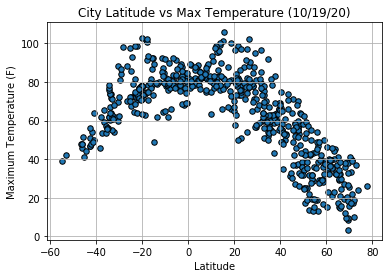

In [17]:
import time

cities_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,4), 
                                marker = "o", s = 30, edgecolors='black',
                               title=f"City Latitude vs Max Temperature ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.savefig('../Output_data/Latitude vs. Temperature Plot.PNG') 
plt.show()

# The code is analyzing how the temperature changes based on the latitude for each hemisphere. 
# It clearly shows that temperature rises going closer to the equator and drops going north or south

## Latitude vs. Humidity Plot

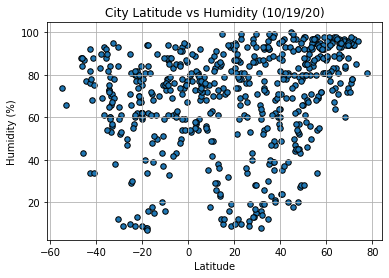

In [18]:
import time
cities_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,4), 
                                marker = "o", s = 30, edgecolors='black',
                               title=f"City Latitude vs Humidity ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../Output_data/Latitude vs. Humidity Plot.PNG') 
plt.show()

# The code is analyzing how the humidity changes based on the latitude for each hemisphere. 
# It is hard to assume there is a strong correlation between these two parameters except humidity tends to be high
# closer to the north pole

## Latitude vs. Cloudiness Plot

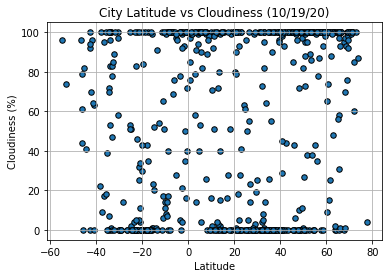

In [19]:
import time
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,4), 
                                marker = "o", s = 30, edgecolors='black',
                               title=f"City Latitude vs Cloudiness ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../Output_data/Latitude vs. Cloudiness Plot.PNG') 
plt.show()

# The code is analyzing how the cloudiness changes based on the latitude for each hemisphere. 
# It is hard to assume there is a strong correlation between these two parameters except cloudiness tends to be either
# 0 or 100% in many locations

## Latitude vs. Wind Speed Plot

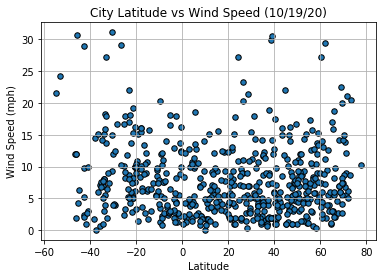

In [20]:
import time
cities_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,4), 
                                marker = "o", s = 30, edgecolors='black',
                               title=f"City Latitude vs Wind Speed ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../Output_data/Latitude vs. Wind Speed Plot.PNG') 
plt.show()

# The code is analyzing how the wind speed changes based on the latitude for each hemisphere. 
# It is hard to assume there is a strong correlation between these two parameters

## Linear Regression

In [26]:
# Creating dataframes for each hemisphere

import scipy.stats as st
from scipy.stats import linregress

north_cities_df = cities_df.loc[cities_df['Lat'] >= 0]

south_cities_df = cities_df.loc[cities_df['Lat'] < 0]

# Creating a function to help easily generate 8 linear regression graphs

def create_linregress(x_values, y_values, x_label, y_label, x_annotation, y_annotation):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_annotation,y_annotation),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values, y_values)
    print(f"The correlation is: {correlation[0]}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7537831760518171
The correlation is: -0.8682068739947977


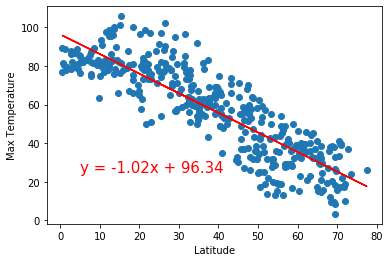

In [33]:
create_linregress(north_cities_df['Lat'], north_cities_df['Max Temp'], 'Latitude', 'Max Temperature', 5, 25, )

plt.savefig('../Output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.PNG') 
plt.show()

# The graph clearly shows that there is a strong negative correlation between latitude and max temperature in NH.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4267631004129749
The correlation is: 0.6532710772818393


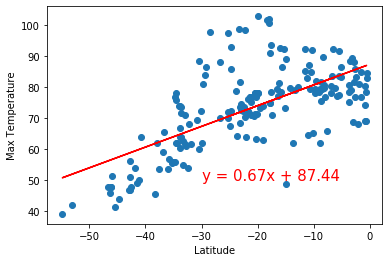

In [34]:
create_linregress(south_cities_df['Lat'], south_cities_df['Max Temp'], 'Latitude', 'Max Temperature', -30, 50)

plt.savefig('../Output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.PNG') 
plt.show()

# The graph clearly shows that there is a moderate positive correlation between latitude and max temperature in SH.
 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09860027667040368
The correlation is: 0.314006809910874


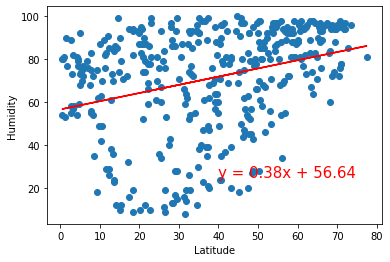

In [35]:
create_linregress(north_cities_df['Lat'], north_cities_df['Humidity'], 'Latitude', 'Humidity', 40, 25)

plt.savefig('../Output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.PNG') 
plt.show()

# The graph clearly shows that there is a weak positive correlation between latitude and humidity in NH.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003465803168566208
The correlation is: -0.018616667716232684


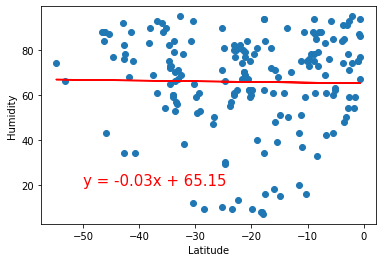

In [36]:
create_linregress(south_cities_df['Lat'], south_cities_df['Humidity'], 'Latitude', 'Humidity', -50, 20)

plt.savefig('../Output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.PNG') 
plt.show()

# The graph clearly shows that there is almost no correlation correlation between latitude and humidity in SH.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02863505440066988
The correlation is: 0.16921895402309367


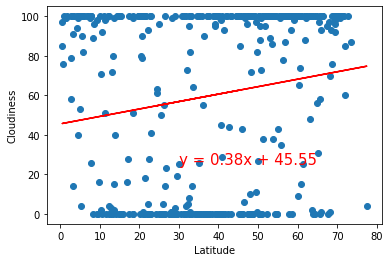

In [32]:
create_linregress(north_cities_df['Lat'], north_cities_df['Cloudiness'], 'Latitude', 'Cloudiness', 30, 25)

plt.savefig('../Output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.PNG') 
plt.show()

# The graph clearly shows that there is a weak positive correlation between latitude and cloudiness in NH.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005677995020082678
The correlation is: 0.07535247189099156


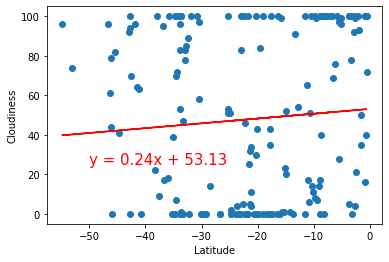

In [37]:
create_linregress(south_cities_df['Lat'], south_cities_df['Cloudiness'], 'Latitude', 'Cloudiness', -50, 25)

plt.savefig('../Output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.PNG') 
plt.show()

# The graph clearly shows that there is a very weak positive correlation between latitude and cloudiness in SH.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019385520571982475
The correlation is: 0.13923189495220725


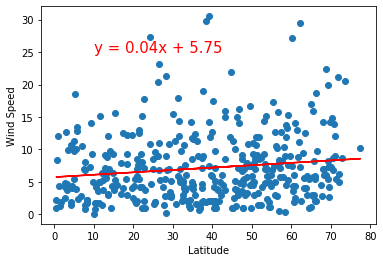

In [38]:
create_linregress(north_cities_df['Lat'], north_cities_df['Wind Speed'], 'Latitude', 'Wind Speed', 10, 25)

plt.savefig('../Output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.PNG') 
plt.show()

# The graph clearly shows that there is a very weak positive correlation between latitude and wind speed in NH.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04029089453290944
The correlation is: -0.20072591893651762


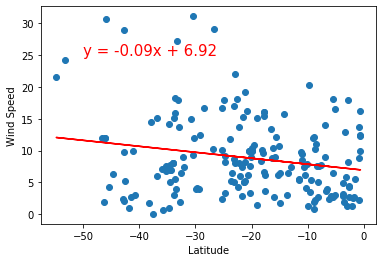

In [39]:
create_linregress(south_cities_df['Lat'], south_cities_df['Wind Speed'], 'Latitude', 'Wind Speed', -50, 25)

plt.savefig('../Output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.PNG') 
plt.show()

# The graph clearly shows that there is a weak positive correlation between latitude and wind speed in SH.
